# Throughput

In [1]:
import numpy as np
import matplotlib.pyplot as plt

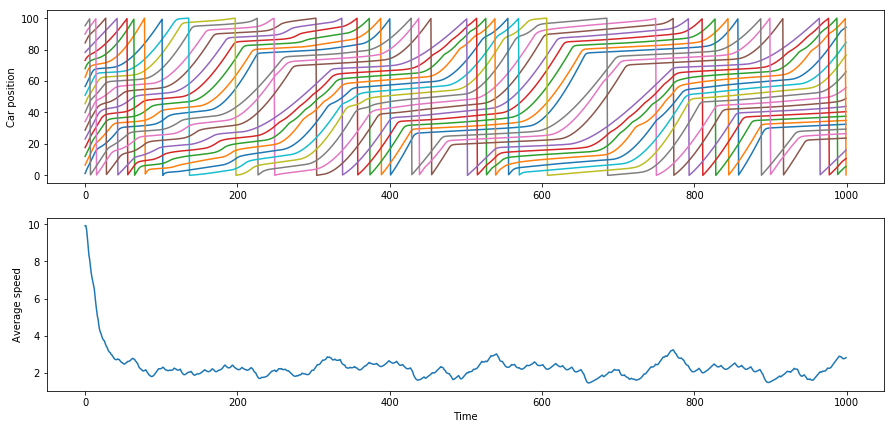

In [130]:
n = 18          # Number of cars
d = 5           # Brake-slamming distance
track = 100     # Length of a circular track
vtarget = 10    # Average target speed
vs = 2          # Variation of speeds for different targets
brake = 0.8     # Minimal brake-slamming coeff (0 for full stop)
tau = 5         # Acceleration time constant
tmax = 1000     # Number of time steps
dt = 0.1        # Integration time step

x = np.linspace(0,track,n,endpoint=False)  # Car coordinates
vt = np.random.randn(n)*vs + vtarget       # Each driver's subjective target speed
v = vt.copy()                              # Car speeds
history = np.zeros((tmax,n))               # History of car positions
meanv = np.zeros(tmax)                     # History of mean speed for the entire flow
for t in range(tmax):
    v += (vt-v)/tau*dt
    for i in range(n-1):
        if abs(x[i+1]-x[i]) <= d:
            v[i] = v[i]*min(brake,(x[i+1]-x[i])/d)
        if abs(x[i+1]+track-x[i]) <= d:
            v[i] = v[i]*min(brake,(x[i+1]+track-x[i])/d)
    if abs(x[0]-x[-1]) <= d:
        v[-1] = v[-1]*min(brake,(x[0]-x[-1])/d)
    if abs(x[0]+track-x[-1]) <= d:
        v[-1] = v[-1]*min(brake,(x[0]+track-x[-1])/d)
    x += v*dt
    x[x>track] -= track    
    history[t,:] = x
    meanv[t] = np.mean(v)
        
    
# Figures
plt.figure(figsize=(15,7));
plt.subplot(211);
plt.plot(history);
plt.ylabel('Car position');

plt.subplot(212);
plt.plot(meanv);
plt.ylabel('Average speed');
plt.xlabel('Time');